In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.special import digamma
%matplotlib inline
from ct_charachterization.utility.utils import central_gamma_pdf
from glob import glob
import pydicom as dicom
import dicom_numpy
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
from scipy.stats import mode
import matplotlib.patches as patches
from ct_charachterization import run_third_algorithm
from ct_charachterization.utility.utils import expand, contract

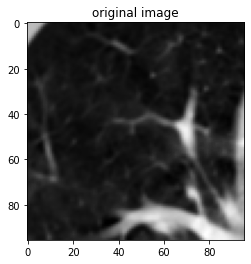

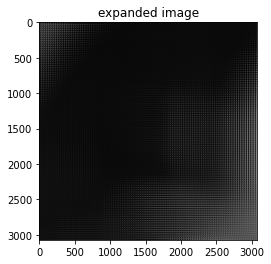

iteration: 1, error: 0.1222940508373219
iteration: 2, error: 0.0
iteration: 1, error: 0.26056151999985916
iteration: 2, error: 0.004762949050374908


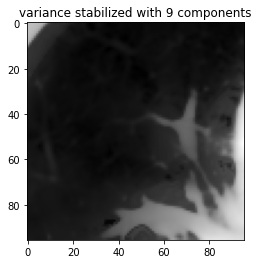

iteration: 1, error: 0.01773023420130203
iteration: 2, error: 0.0
iteration: 1, error: 0.24381416701647454
iteration: 2, error: 8.091469880420277e-15


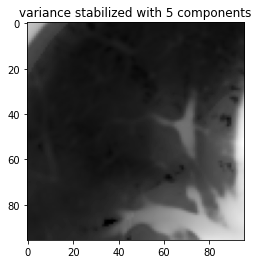

In [11]:
img = np.load(f'../resources/2d_img.npy')[90:410, 90:410]
luna = np.load(f'../resources/luna_cropped.npy')
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
mu_5 = np.array([-1000, -700, -84, 40, 200])


y = luna[:128,:128]
plt.imshow(y[16:112,16:112], cmap='gray')
plt.title("original image")
plt.show()

big_y = expand(small_img=y, neighborhood_size=32)
big_y = big_y[16 * 32:(128-16) * 32, 16 * 32:(128-16) * 32]
plt.imshow(big_y, cmap='gray')
plt.title("expanded image")
plt.show()


big_y_stab_9 = run_third_algorithm(big_y, mu_9, non_central=True, constant_c=10, neighborhood_size=32, max_iter=5)
y_stab_9 = contract(big_img=big_y_stab_9, neighborhood_size=32)
plt.imshow(y_stab_9, cmap='gray')
plt.title("variance stabilized with 9 components")
plt.show()


big_y_stab_5 = run_third_algorithm(big_y, mu_5, non_central=True, constant_c=10, neighborhood_size=32, max_iter=5)
y_stab_5 = contract(big_img=big_y_stab_5, neighborhood_size=32)
plt.imshow(y_stab_5, cmap='gray')
plt.title("variance stabilized with 5 components")
plt.show()

Results above have a lot in common with the right image below which is the stabilized image from the paper (Fig. 12):

![fig12](../resources/figs/fig12.png)

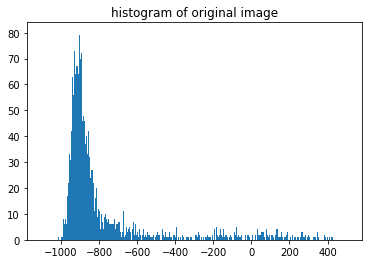

min: -1024, mean: -772.1635199652778, max: 448


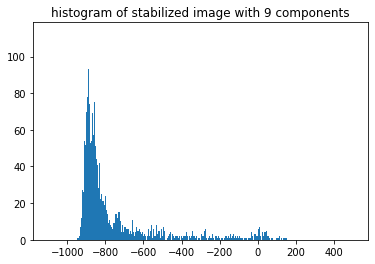

min: -948.8146033676445, mean: -753.4699516250093, max: 190.5448205490743


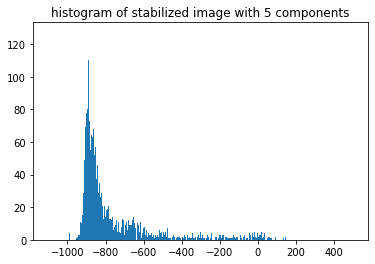

min: -989.4099569228121, mean: -752.7355853409485, max: 175.37364829650323


In [12]:
flat = y[16:112,16:112].flatten()
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram of original image")
plt.show()
print(f'min: {np.min(flat)}, mean: {np.mean(flat)}, max: {np.max(flat)}')


flat = y_stab_9.flatten() - 1030
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram of stabilized image with 9 components")
plt.show()
print(f'min: {np.min(flat)}, mean: {np.mean(flat)}, max: {np.max(flat)}')



flat = y_stab_5.flatten() - 1030
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram of stabilized image with 5 components")
plt.show()
print(f'min: {np.min(flat)}, mean: {np.mean(flat)}, max: {np.max(flat)}')

# Using 9 components for the whole image

(320, 320)


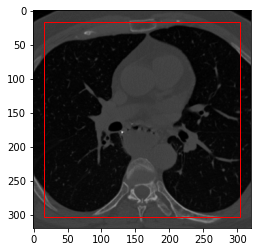

In [2]:
print(img.shape)
fig1, ax1 = plt.subplots(1)
ax1.imshow(img, cmap='gray')
rect = patches.Rectangle((16, 16),288,288,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect)
plt.show()
mu = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])

In [3]:
def get_block_stabilized_img(y, mu):
    neigh = 32
    block = 96
    w = y.shape[0]
    h = y.shape[1]
    y_stab = np.empty((w-neigh, h-neigh))
    for i in range(int((w-neigh)/block)):
        for j in range(int((h-neigh)/block)):
            print(i,j)
            big_y = expand(small_img=y[i*block:(i+1)*block + neigh, j*block:(j+1)*block+neigh], neighborhood_size=neigh)
            big_y = big_y[int(neigh/2) * neigh:(block+int(neigh/2)) * neigh, int(neigh/2) * neigh:(block+int(neigh/2)) * neigh]
            big_y_stab = run_third_algorithm(big_y, mu, non_central=True, constant_c=10, neighborhood_size=neigh, max_iter=4, tol=0.01)
            ys = contract(big_img=big_y_stab, neighborhood_size=neigh)
            y_stab[i*block:(i+1)*block, j*block:(j+1)*block] = ys
    return y_stab

In [4]:
y = img
y_stab = get_block_stabilized_img(y, mu_9)

0 0
iteration: 1, error: 0.4719516125565326
iteration: 2, error: 4.237232868399964e-16


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta_before_expansion = np.array([initial_pi, initial_alpha, initial_beta])
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:10: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (np.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


iteration: 1, error: 0.48409983486041946


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/utility/utils.py:72: RuntimeWarning: overflow encountered in power
  form = np.nan_to_num(np.power(y, (alpha - 1)) * np.exp(-y / beta))
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/utility/utils.py:73: RuntimeWarning: overflow encountered in multiply
  denominator = np.nan_to_num(np.power(beta, alpha) * gamma(alpha))


iteration: 2, error: 0.003839963087686636


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:36: RuntimeWarning: invalid value encountered in sqrt
  y_stab = (constant_c * (np.sqrt(y) - first_local_sample_conditioned_moment) / np.sqrt(
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:36: RuntimeWarning: invalid value encountered in true_divide
  y_stab = (constant_c * (np.sqrt(y) - first_local_sample_conditioned_moment) / np.sqrt(


0 1
iteration: 1, error: 0.5245445296708208
iteration: 2, error: 2.0838305656979472e-14
iteration: 1, error: 0.6182570258836361
iteration: 2, error: 7.558938481662933e-14
0 2
iteration: 1, error: 0.41655617242453163
iteration: 2, error: 1.2741136751705083e-14
iteration: 1, error: 0.4588860075953997
iteration: 2, error: 0.005151556833511197
1 0
iteration: 1, error: 0.14435458985550806
iteration: 2, error: 9.005134813627573e-15
iteration: 1, error: 0.24176430412758307
iteration: 2, error: 8.654858958345668e-15
1 1
iteration: 1, error: 0.7642054942980052
iteration: 2, error: 1.1884153966471587e-14
iteration: 1, error: 0.6025885139801163


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/utility/utils.py:72: RuntimeWarning: invalid value encountered in multiply
  form = np.nan_to_num(np.power(y, (alpha - 1)) * np.exp(-y / beta))


iteration: 2, error: 0.0025061814422934307


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:30: RuntimeWarning: invalid value encountered in true_divide
  first_local_sample_conditioned_moment[..., j] = np.nan_to_num(first_numerator_summation / denominator_summation)
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:32: RuntimeWarning: invalid value encountered in true_divide
  second_numerator_summation / denominator_summation)


1 2
iteration: 1, error: 0.7631948492379708
iteration: 2, error: 6.046559905074262e-16
iteration: 1, error: 0.464563241220584
iteration: 2, error: 0.005443582427604519
2 0
iteration: 1, error: 0.3577941212895907
iteration: 2, error: 1.1073585719865629e-14
iteration: 1, error: 0.34914909380156023
iteration: 2, error: 1.2424133684235985e-14
2 1
iteration: 1, error: 0.5470701158690852
iteration: 2, error: 2.5441938230033912e-15
iteration: 1, error: 0.5114284330791553
iteration: 2, error: 1.568768206110781e-14
2 2
iteration: 1, error: 0.35933817290351694
iteration: 2, error: 1.9923862901101145e-16
iteration: 1, error: 0.31720999333480804
iteration: 2, error: 1.2075026050314681e-14


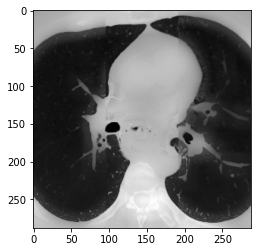

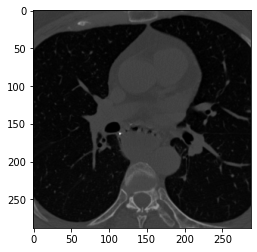

In [5]:
plt.imshow(y_stab, cmap='gray')
plt.show()
plt.imshow(y[16:304,16:304], cmap='gray')
plt.show()

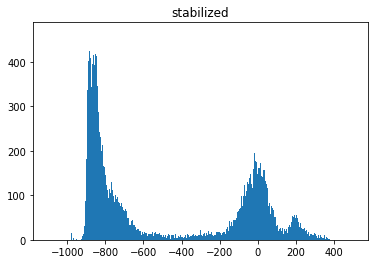

min: -982.1206470432381, mean: -473.7239634866142, max: 383.5093826449149


In [8]:
flat = y_stab.flatten() - 1030
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("stabilized")
plt.show()
print(f'min: {np.min(flat)}, mean: {np.mean(flat)}, max: {np.max(flat)}')

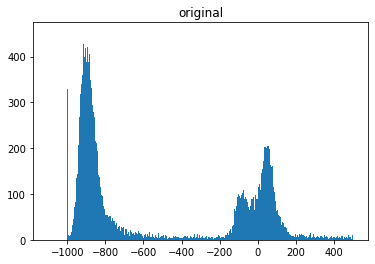

min: -1000, mean: -481.90190972222223, max: 3000


In [9]:
flat = y[16:304,16:304].flatten()
ax = plt.subplot(1, 1, 1)
ax.hist(flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("original")
plt.show()
print(f'min: {np.min(flat)}, mean: {np.mean(flat)}, max: {np.max(flat)}')